In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('files/raw.csv')
print(len(df), 'rows')
df

7043 rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# VISUALIZAÇÃO DOS DADOS

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### VALORES ÚNICOS

In [5]:
def showUnique(df):
    w = max(len(c) for c in df.columns)  # largura do maior nome de coluna

    for col in df.columns:
        unique = df[col].unique().tolist()
        N      = len(unique)
        exemplo = ', '.join(map(str, unique[:10]))
        print(f'{col:<{w}}  [{exemplo}{f" ... +{len(unique)}" if N > 10 else ""}]')


showUnique(df)

customerID        [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU ... +7043]
gender            [Female, Male]
SeniorCitizen     [0, 1]
Partner           [Yes, No]
Dependents        [No, Yes]
tenure            [1, 34, 2, 45, 8, 22, 10, 28, 62, 13 ... +73]
PhoneService      [No, Yes]
MultipleLines     [No phone service, No, Yes]
InternetService   [DSL, Fiber optic, No]
OnlineSecurity    [No, Yes, No internet service]
OnlineBackup      [Yes, No, No internet service]
DeviceProtection  [No, Yes, No internet service]
TechSupport       [No, Yes, No internet service]
StreamingTV       [No, Yes, No internet service]
StreamingMovies   [No, Yes, No internet service]
Contract          [Month-to-month, One year, Two year]
PaperlessBilling  [Yes, No]
PaymentMethod     [Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]
MonthlyCharges    [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8,

- Variável Alvo, verificação de desbalanceamento

In [6]:
TARGET = 'Churn'

for label in df[TARGET].unique():
    total = (df[TARGET] == label).sum()
    print(f'classe {label}: {(total)} ({total/len(df)*100:.2f}%)')

classe No: 5174 (73.46%)
classe Yes: 1869 (26.54%)


### COLUNAS INVÁLIDAS

In [7]:
nan_rows = df[df.isna().any(axis=1)]
print(len(nan_rows), 'colunas NaN')
nan_rows

0 colunas NaN


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
df = df.drop(columns=['customerID']).reset_index(drop=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### LINHAS INVÁLIDAS

In [9]:
nan_columns = df.columns[df.isna().any()].tolist()

for column in nan_columns:
    N = df[column].isna().sum()
    print(f'"{column}": {N} NaN rows ({N/len(df)*100:.2f}%)')

# ANÁLISE DOS DADOS

### COMPARAÇÃO - CATEGÓRICOS

In [10]:
CATEG_LIMIT = 10
df_categ  = df.loc[:, df.nunique() <= CATEG_LIMIT]
df_categ.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


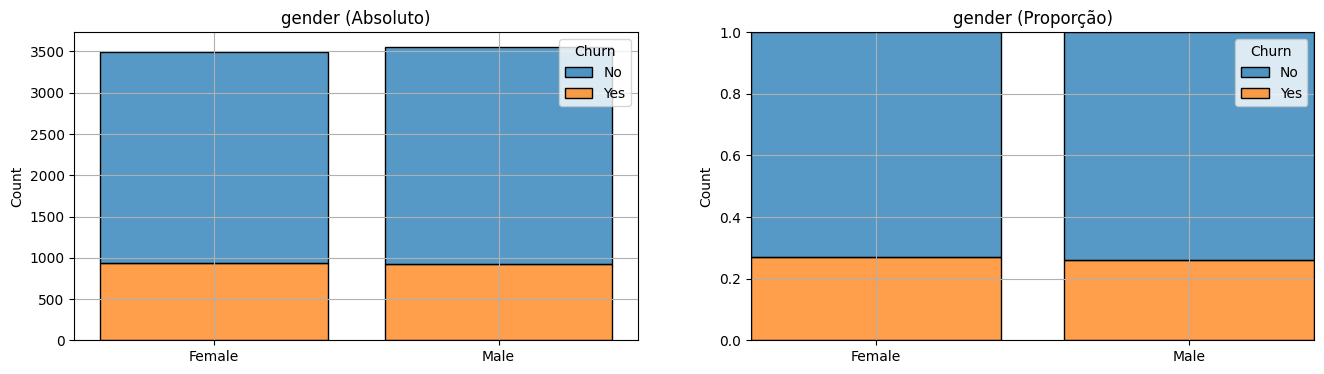

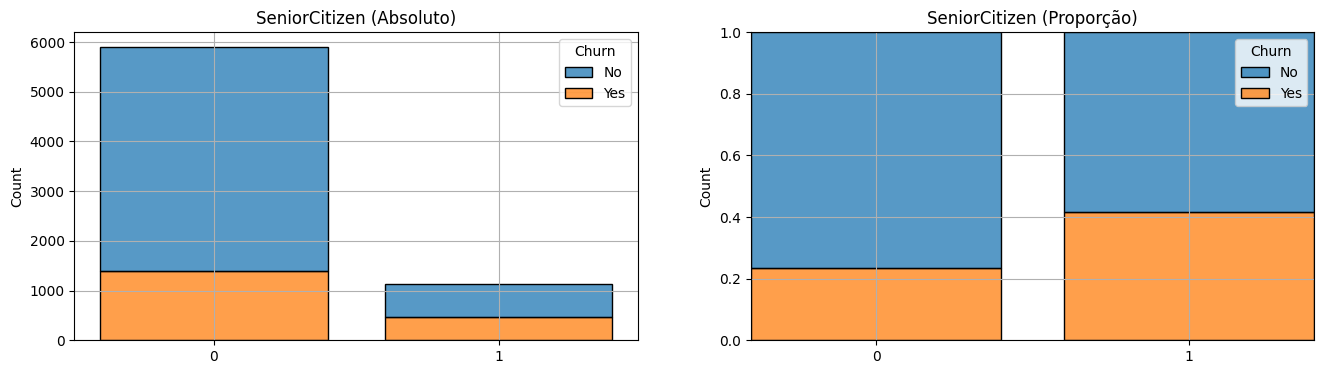

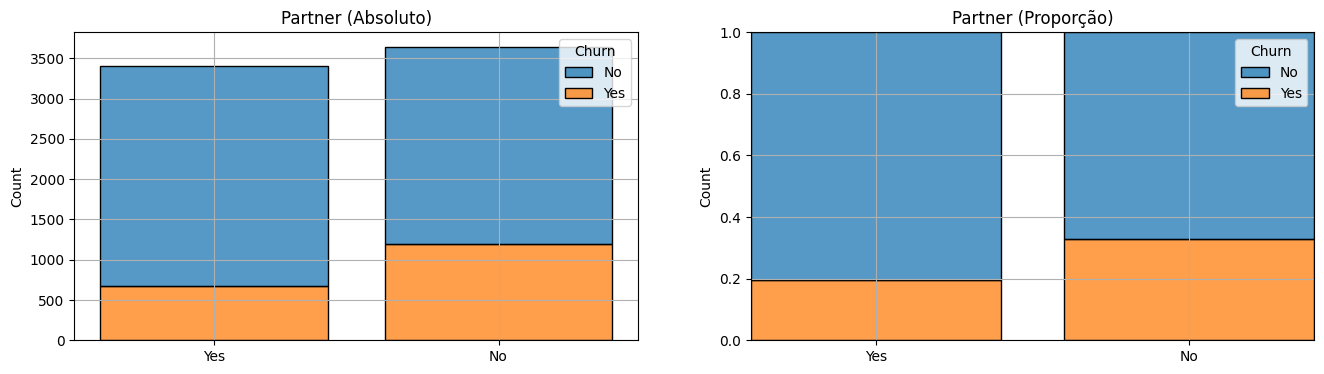

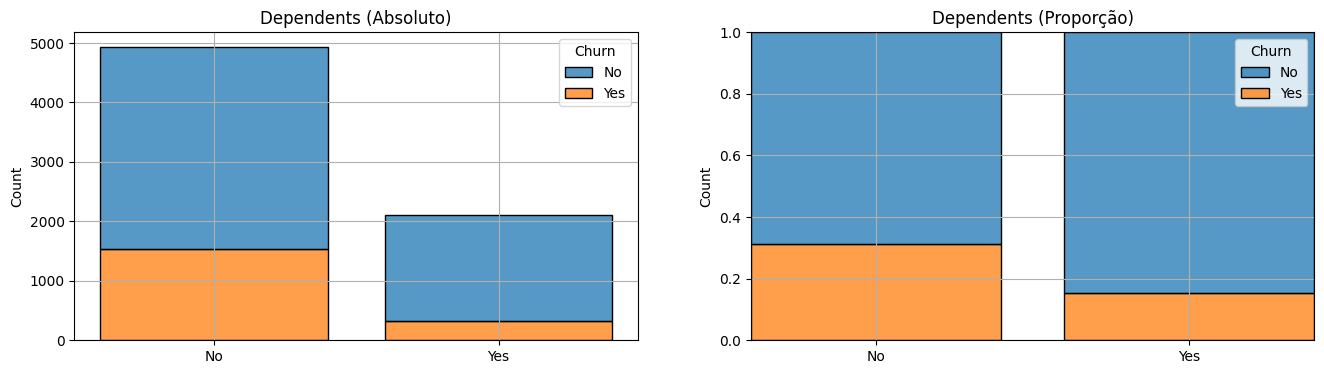

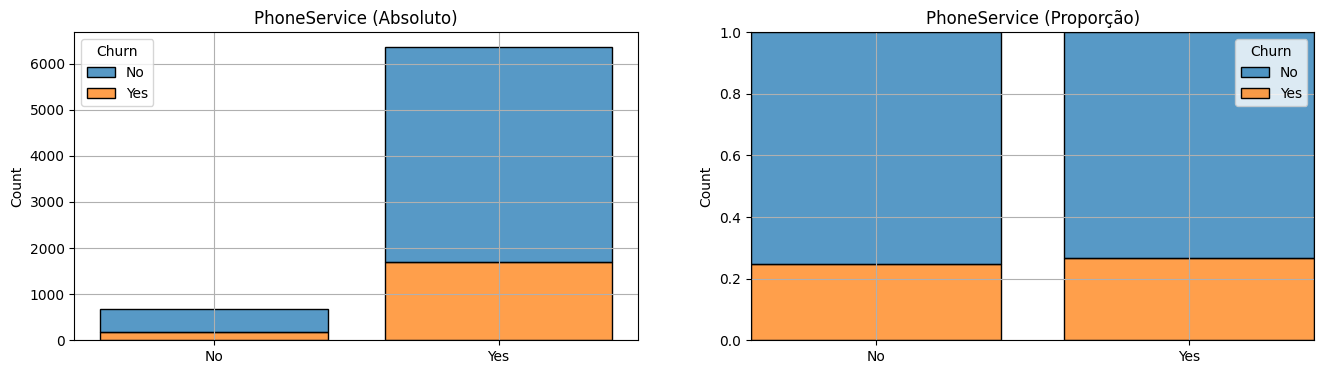

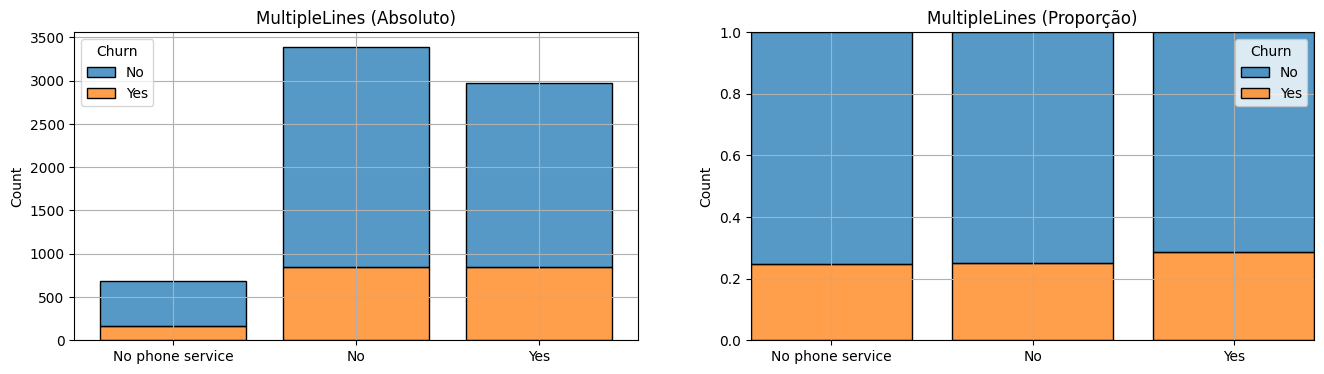

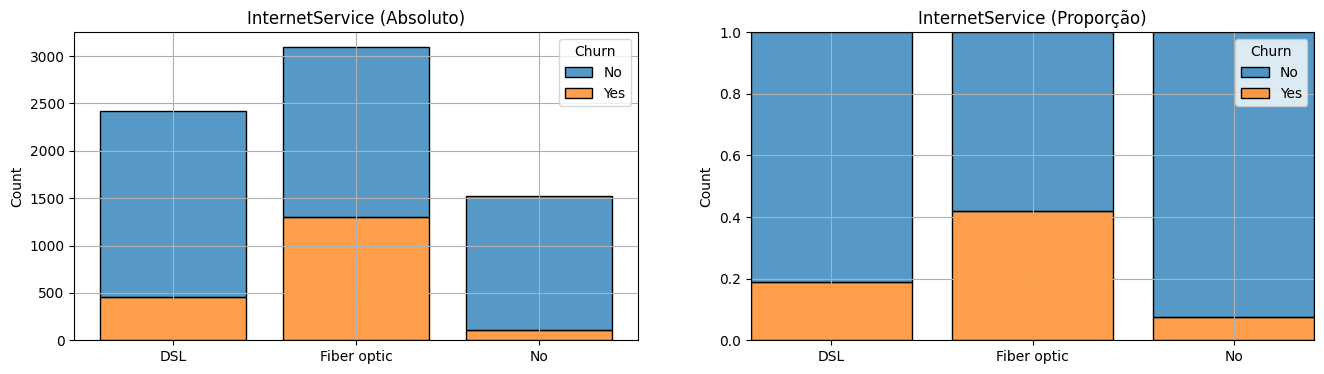

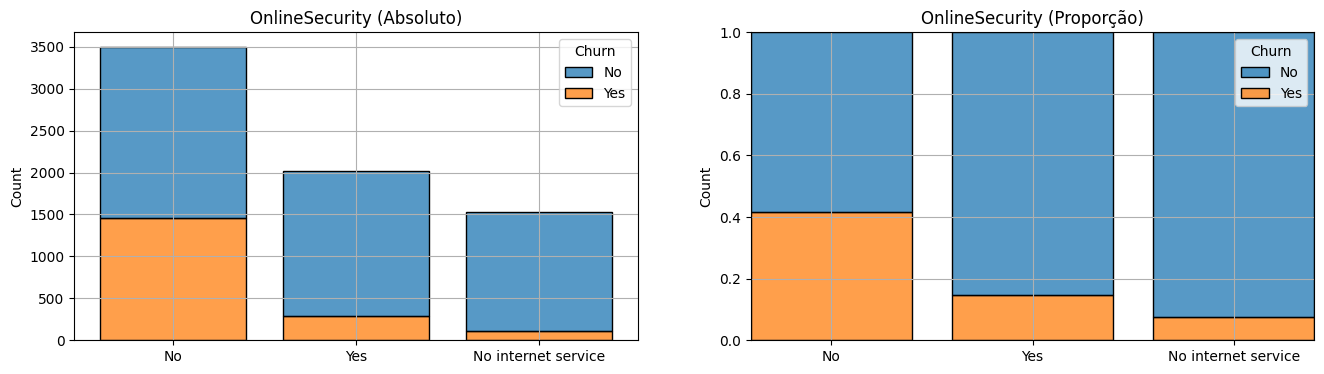

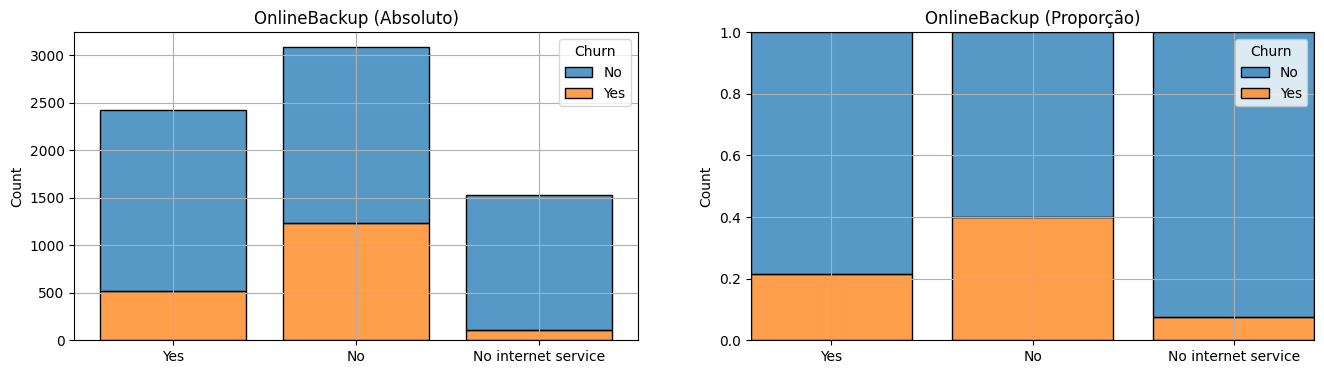

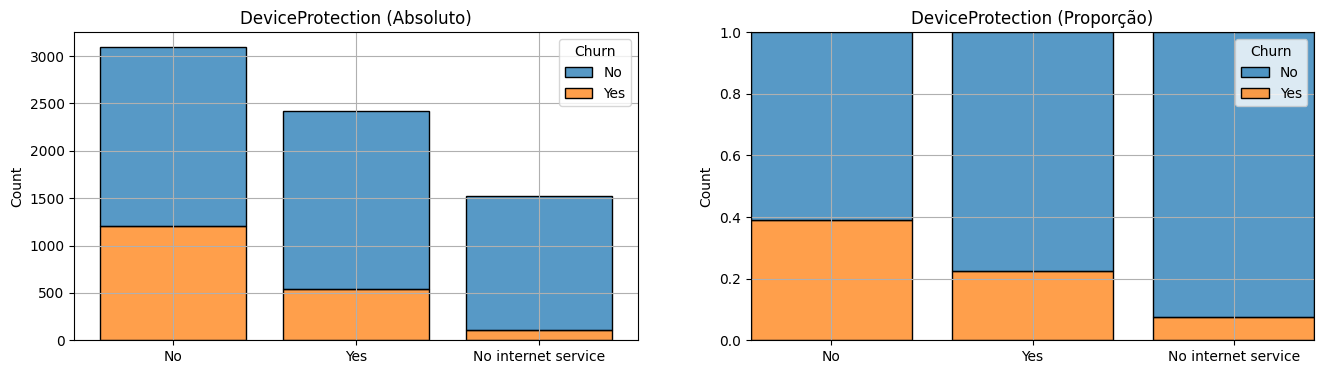

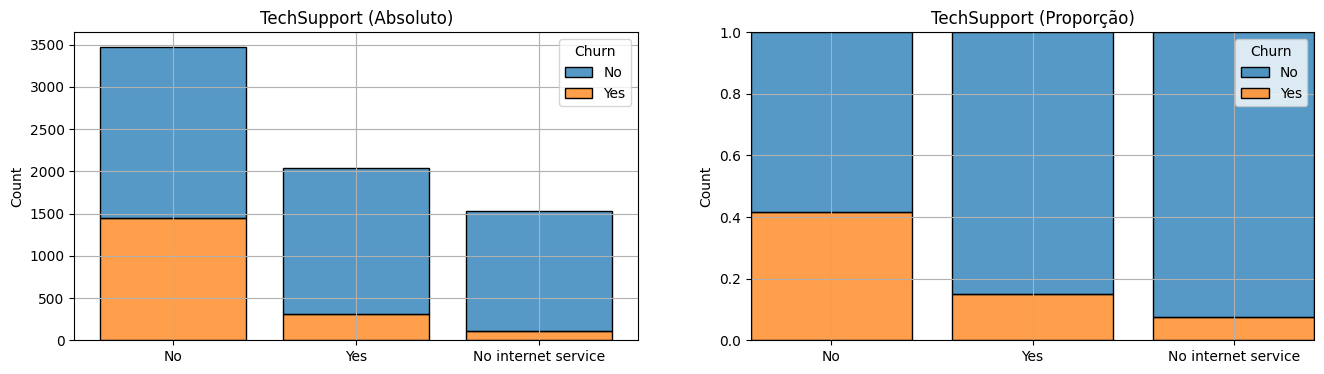

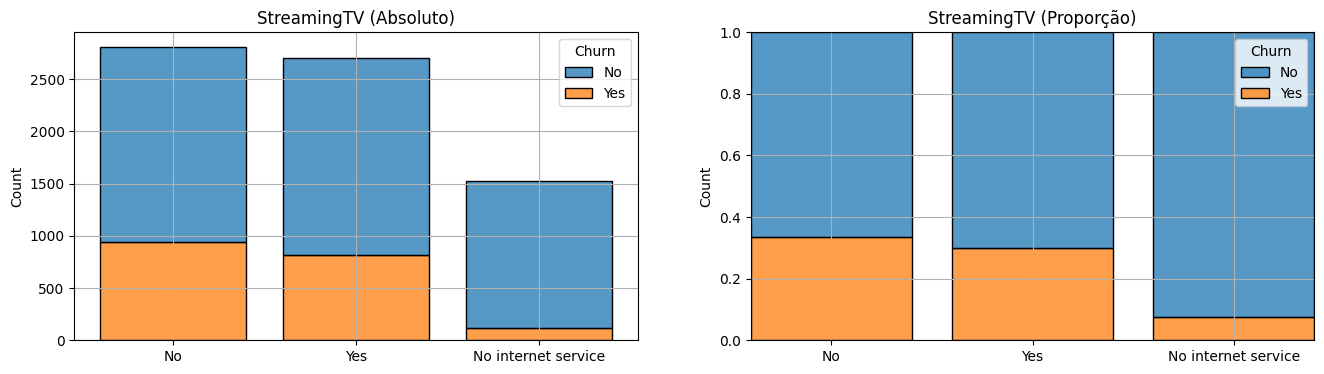

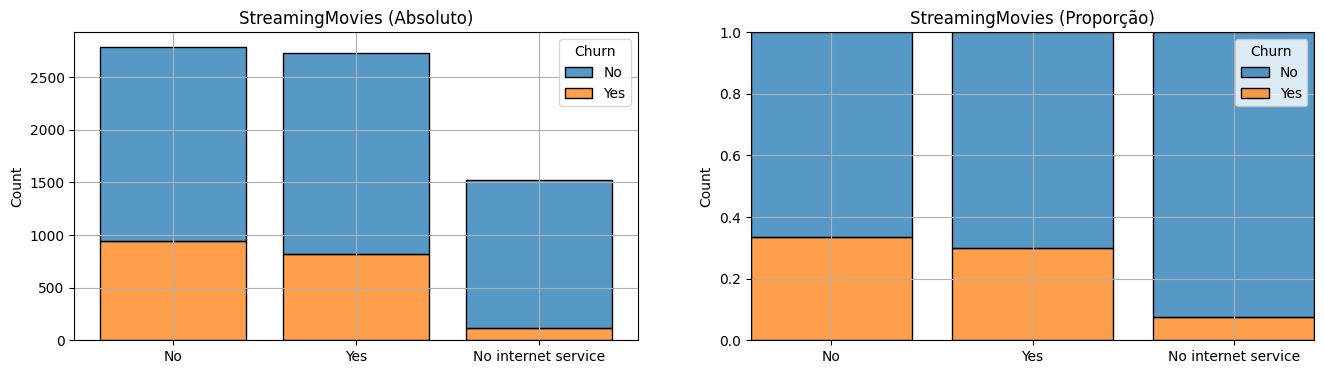

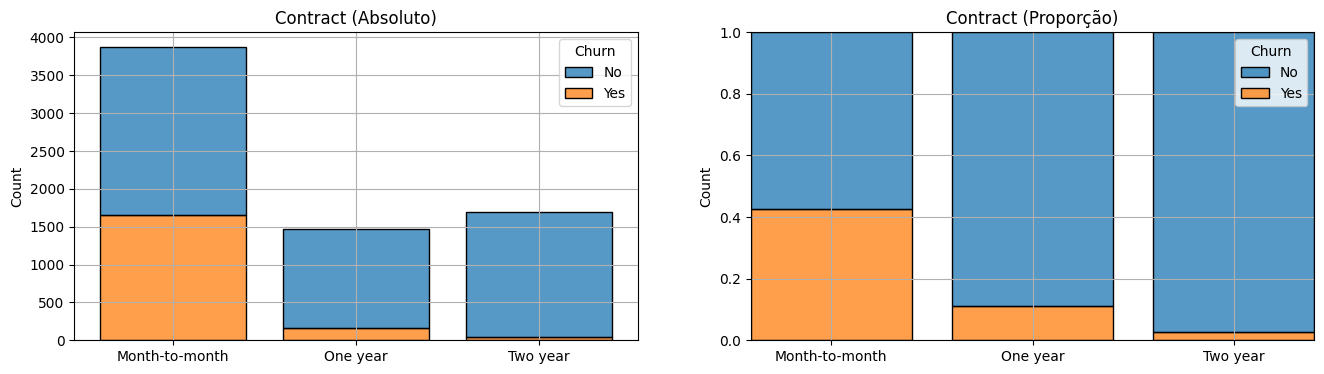

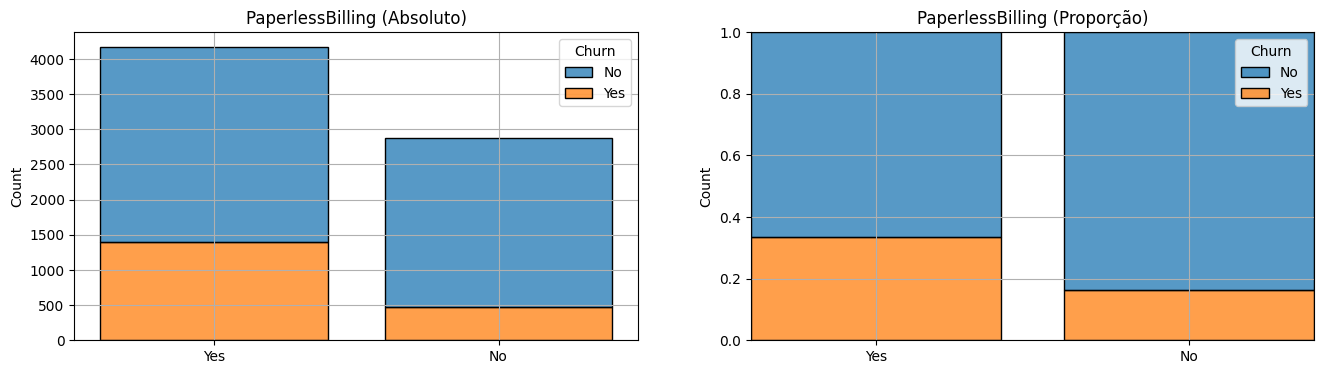

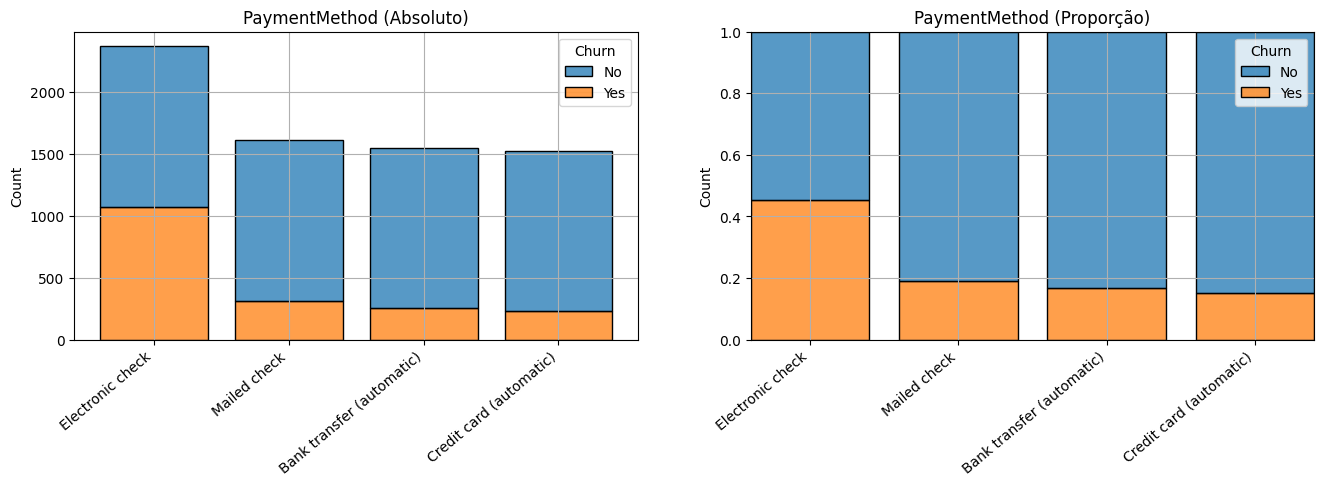

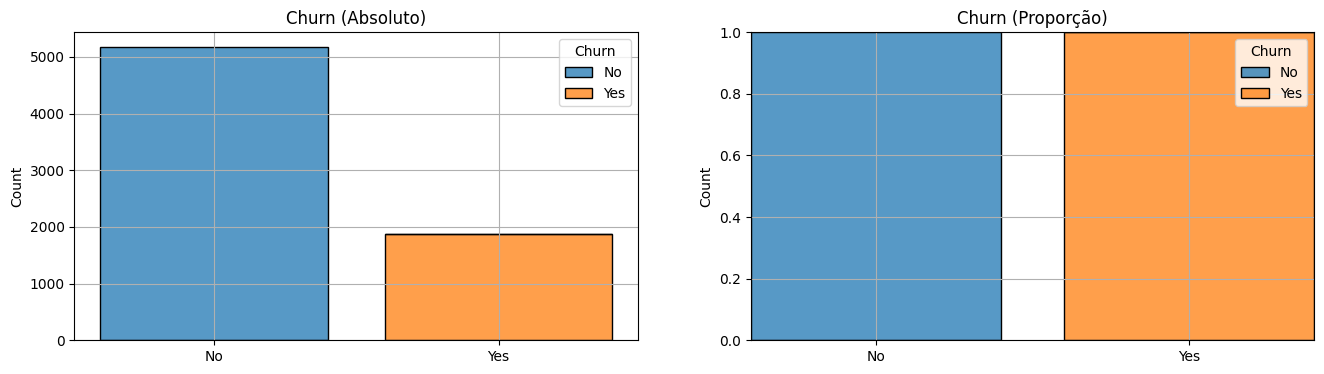

In [11]:
for col in df_categ.columns:
    target = df_categ[col].astype(str)
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_categ, x=target, hue=TARGET, multiple='stack', discrete=True, shrink=0.8)
    plt.title(f'{col} (Absoluto)'); plt.grid(); plt.xlabel('')
    if df[col].unique().__len__() > 3: plt.xticks(rotation=40, ha='right')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_categ, x=target, hue=TARGET, multiple='fill', discrete=True, shrink=0.8)
    plt.title(f'{col} (Proporção)'); plt.grid(); plt.xlabel('')
    if df[col].unique().__len__() > 3: plt.xticks(rotation=40, ha='right')

### COMPARAÇÃO - NUMÉRICOS

In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


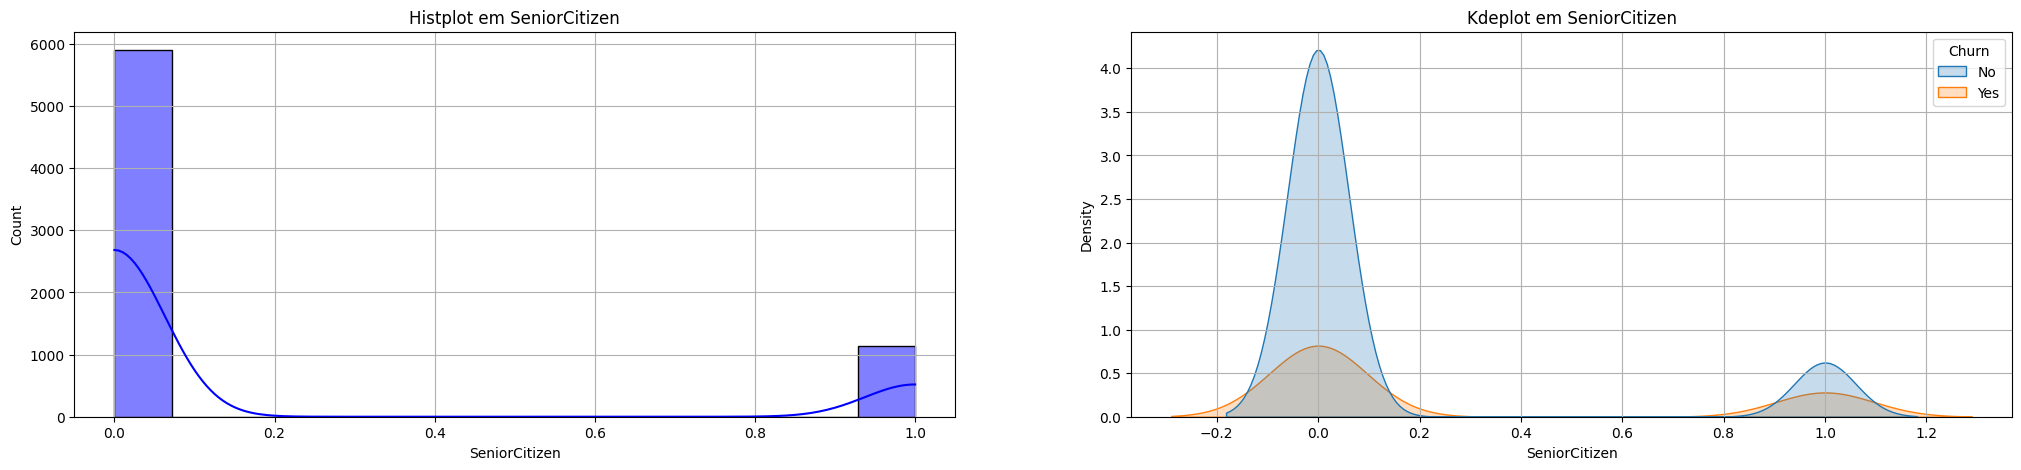

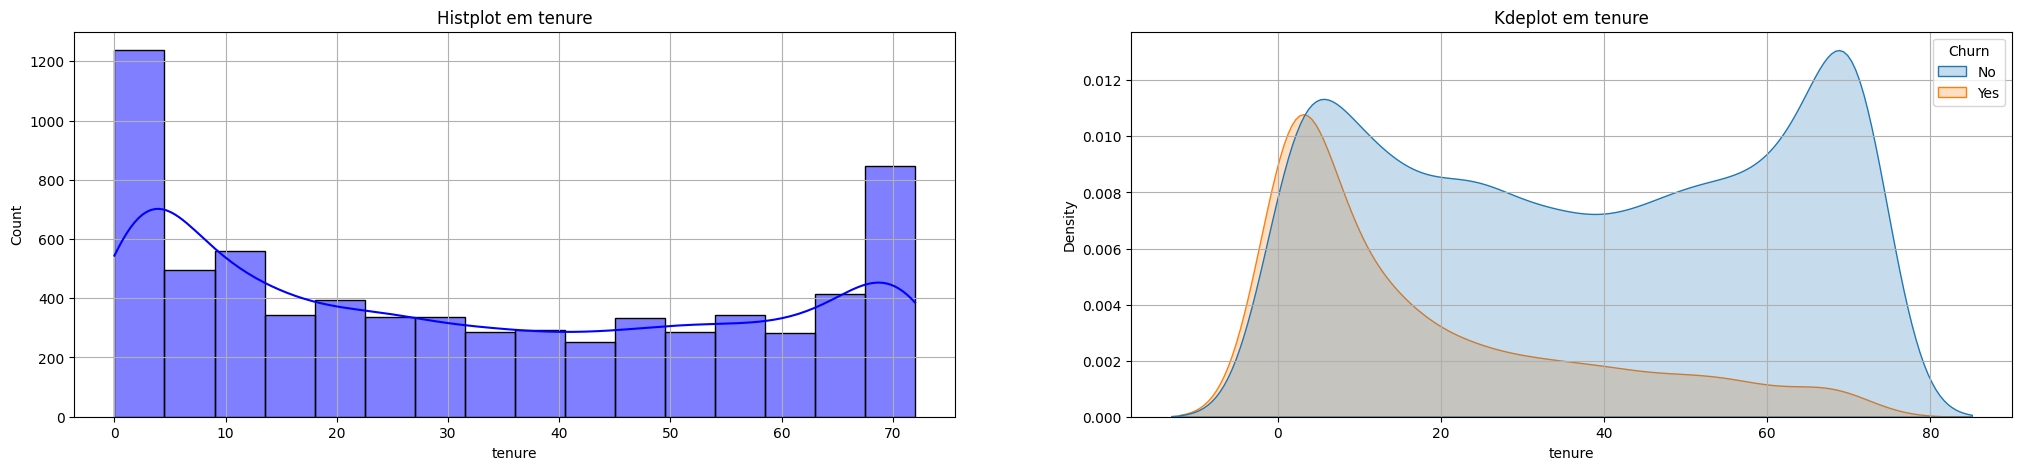

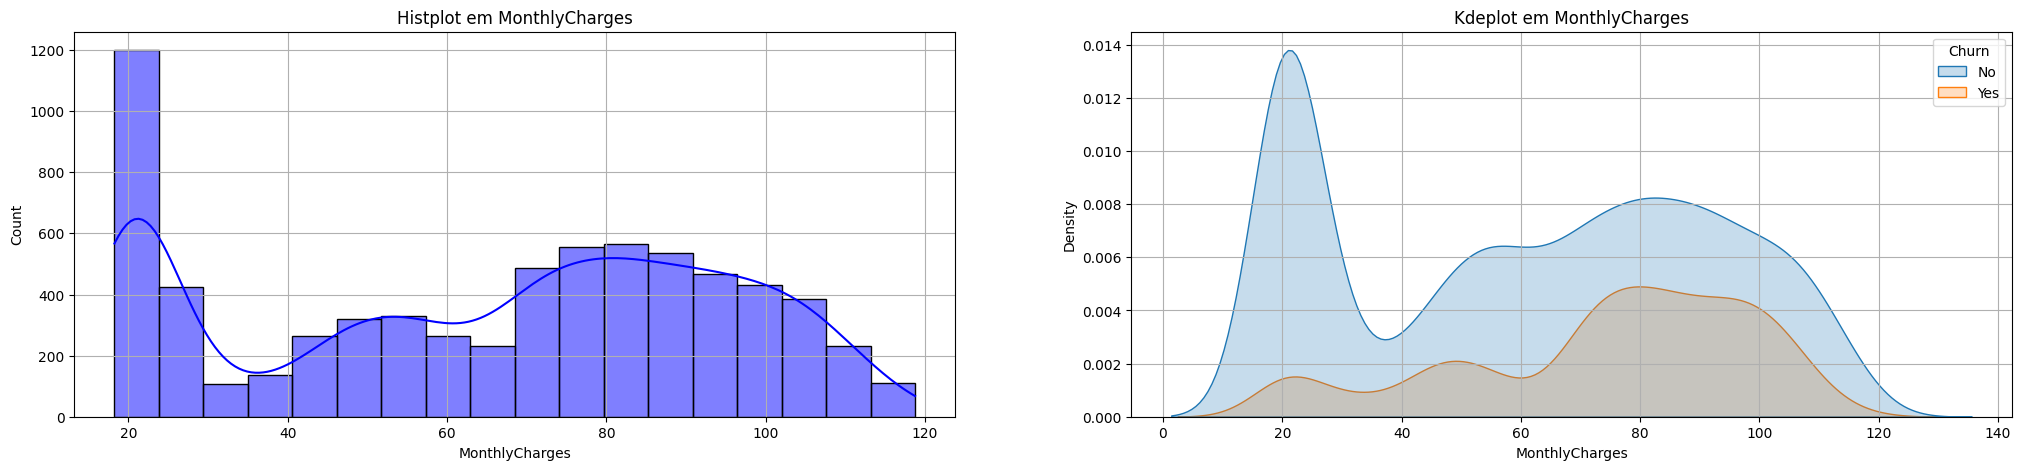

In [13]:
for col in df_numeric:
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], color='blue', kde=True); plt.grid()
    plt.title(f'Histplot em {col}')

    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=col, hue=TARGET, fill=True); plt.grid()
    plt.title(f'Kdeplot em {col}')

# CONVERSÃO DE TIPOS

In [14]:
showUnique(df)

gender            [Female, Male]
SeniorCitizen     [0, 1]
Partner           [Yes, No]
Dependents        [No, Yes]
tenure            [1, 34, 2, 45, 8, 22, 10, 28, 62, 13 ... +73]
PhoneService      [No, Yes]
MultipleLines     [No phone service, No, Yes]
InternetService   [DSL, Fiber optic, No]
OnlineSecurity    [No, Yes, No internet service]
OnlineBackup      [Yes, No, No internet service]
DeviceProtection  [No, Yes, No internet service]
TechSupport       [No, Yes, No internet service]
StreamingTV       [No, Yes, No internet service]
StreamingMovies   [No, Yes, No internet service]
Contract          [Month-to-month, One year, Two year]
PaperlessBilling  [Yes, No]
PaymentMethod     [Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]
MonthlyCharges    [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15 ... +1585]
TotalCharges      [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95 ... +6531]
Churn             [No,

In [15]:
df = df.map(lambda val: 'No' if val == 'No internet service' else val)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
def parseNumeric(df):
    # convertendo numerico (n >= 10)
    objects = df.select_dtypes(include="object").columns
    numeric = [c for c in objects if df[c].nunique() > 10]

    for column in numeric:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

    # convertendo booleano (n <= 2)
    objects = df.select_dtypes(include="object").columns
    boolean = [c for c in objects if df[c].nunique() <= 2]

    for column in boolean:
        vals  = sorted(df[column].dropna().unique())
        df[column] = False if len(vals) == 1 else df[column].map({vals[0]: False, vals[1]: True}).astype("boolean")

    # convertendo dummies (n > 2)
    categoric = [c for c in df.columns if df[c].dtype == "object" and df[c].nunique() > 2]
    df = pd.get_dummies(df, columns=categoric, drop_first=True)
    return df


df = parseNumeric(df)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,0,True,False,1,False,False,True,False,False,False,False,True,29.85,29.85,False,True,False,False,False,False,False,False,True,False
1,True,0,False,False,34,True,True,False,True,False,False,False,False,56.95,1889.50,False,False,False,False,False,True,False,False,False,True
2,True,0,False,False,2,True,True,True,False,False,False,False,True,53.85,108.15,True,False,False,False,False,False,False,False,False,True
3,True,0,False,False,45,False,True,False,True,True,False,False,False,42.30,1840.75,False,True,False,False,False,True,False,False,False,False
4,False,0,False,False,2,True,False,False,False,False,False,False,True,70.70,151.65,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,0,True,True,24,True,True,False,True,True,True,True,True,84.80,1990.50,False,False,True,False,False,True,False,False,False,True
7039,False,0,True,True,72,True,False,True,True,False,True,True,True,103.20,7362.90,False,False,True,True,False,True,False,True,False,False
7040,False,0,True,True,11,False,True,False,False,False,False,False,True,29.60,346.45,False,True,False,False,False,False,False,False,True,False
7041,True,1,True,False,4,True,False,False,False,False,False,False,True,74.40,306.60,True,False,True,True,False,False,False,False,False,True


In [17]:
showUnique(df)

gender                                 [False, True]
SeniorCitizen                          [0, 1]
Partner                                [True, False]
Dependents                             [False, True]
tenure                                 [1, 34, 2, 45, 8, 22, 10, 28, 62, 13 ... +73]
PhoneService                           [False, True]
OnlineSecurity                         [False, True]
OnlineBackup                           [True, False]
DeviceProtection                       [False, True]
TechSupport                            [False, True]
StreamingTV                            [False, True]
StreamingMovies                        [False, True]
PaperlessBilling                       [True, False]
MonthlyCharges                         [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15 ... +1585]
TotalCharges                           [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95 ... +6531]
Churn                                  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   boolean
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   boolean
 3   Dependents                             7043 non-null   boolean
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   boolean
 6   OnlineSecurity                         7043 non-null   boolean
 7   OnlineBackup                           7043 non-null   boolean
 8   DeviceProtection                       7043 non-null   boolean
 9   TechSupport                            7043 non-null   boolean
 10  StreamingTV                            7043 non-null   boolean
 11  Stre

# CORRELAÇÕES

- **Pearson:** $\Rightarrow$ Melhor quando a relação é linear e as variáveis são numéricas contínuas com distribuição razoavelmente normal, útil para dados em escala intervalar ou de razão, exemplo, altura e peso de pessoas na mesma faixa etária.

- **Spearman:** Ideal para relações monotônicas que podem ser não lineares e para dados com outliers ou escalas ordinais, funciona com rankings e Likert, exemplo, posição em um ranking de vendas versus satisfação do cliente em escala de 1 a 5.

- **Kendall:** Preferível em amostras pequenas ou com muitos empates em dados ordinais, mais robusta e interpretável como concordância de pares, exemplo, comparar duas ordens de preferência dadas por juízes.

{'tenure': -0.35222867011307885,
 'InternetService_Fiber optic': 0.3080197449448227,
 'Contract_Two year': -0.30225346934965014,
 'PaymentMethod_Electronic check': 0.30191874901128496,
 'InternetService_No': -0.22789044975609363,
 'TotalCharges': -0.1983242626039948,
 'MonthlyCharges': 0.19335642223784716,
 'PaperlessBilling': 0.19182533166646878,
 'Contract_One year': -0.1778200183499079,
 'OnlineSecurity': -0.1712262919485523,
 'TechSupport': -0.16467355590159402,
 'Dependents': -0.1642214015797254,
 'SeniorCitizen': 0.15088932817647233,
 'Partner': -0.15044754495917623,
 'PaymentMethod_Credit card (automatic)': -0.1343017506626284,
 'PaymentMethod_Mailed check': -0.09168283858842928,
 'OnlineBackup': -0.08225486893814256,
 'DeviceProtection': -0.06615979128028963,
 'StreamingTV': 0.06322774611875735,
 'StreamingMovies': 0.06138154801518694,
 'MultipleLines_Yes': 0.04010212769982612,
 'MultipleLines_No phone service': -0.011941980029003091,
 'PhoneService': 0.011941980029003084,
 'ge

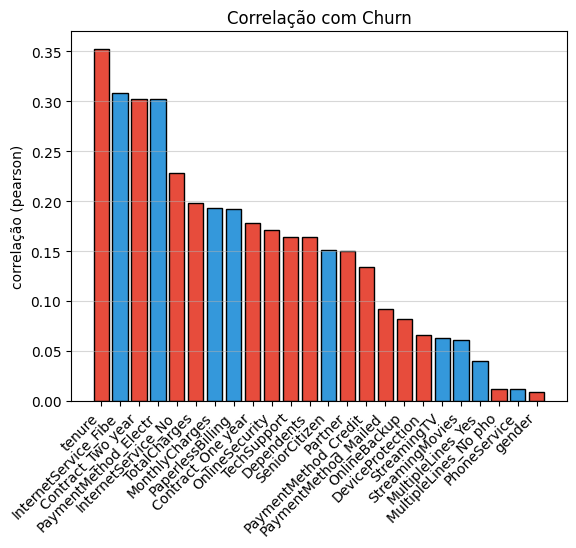

In [19]:
class Correlations:
    def __init__(self, df, tresh=0.5, method='pearson'):
        self.df = df.copy()
        self.tresh  = tresh
        self.method = method
        self.matrix = self.df.corr(method=self.method)

    def get(self, target_col):
        if target_col not in self.matrix.columns:
            return {}
            
        corr = self.matrix[target_col].drop(target_col)
        keep = corr[abs(corr) >= self.tresh].sort_values(key=abs, ascending=False)        
        return {ref: corr for ref, corr in keep.items()}
    
    def all(self):
        result = {}
        for col in self.matrix.columns:
            info = self.get(col)
            if len(info) > 0:
                result[col] = info
        return result
    
    def plot(self, target_col, show_max=None):
        corrs = self.get(target_col)
        
        if not corrs: 
            return
        
        original_values = self.matrix.loc[list(corrs.keys()), target_col]
        labels = [str(label)[:20] for label in corrs.keys()]
        values = [abs(v) for v in corrs.values()] # Altura da barra = Importância
        
        colors = ['#3498db' if original_values[label] > 0 else '#e74c3c' for label in corrs.keys()]
        plt.bar(labels[:show_max], values[:show_max], color=colors[:show_max], edgecolor='black')
        plt.title(f'Correlação com {target_col}')
        plt.ylabel(f'correlação ({self.method})'); plt.grid(axis='y', alpha=0.5)

        if len(corrs) >= 4:
            plt.xticks(rotation=45, ha='right')
    
    def heatmap(self, target_col, n=None):
        if target_col not in self.matrix.columns: 
            return

        top_cols = self.matrix[target_col].abs().sort_values(ascending=False).drop(target_col)
        
        if n: 
            top_cols = top_cols.head(n)
        
        cols_to_plot  = [target_col] + top_cols.index.tolist()
        matrix_subset = self.matrix.loc[cols_to_plot, cols_to_plot]

        plt.figure(figsize=(17, 10))
        sns.heatmap(matrix_subset.abs(), annot=True, fmt=".2f", cmap='Blues', vmin=0, vmax=1)
        plt.title(f'Mapa de Calor (Top {n})')
        plt.xticks(rotation=45, ha='right')
        plt.show()


corr = Correlations(df, tresh=0.00)
corr.plot(TARGET, show_max=None)
corr.get(TARGET)

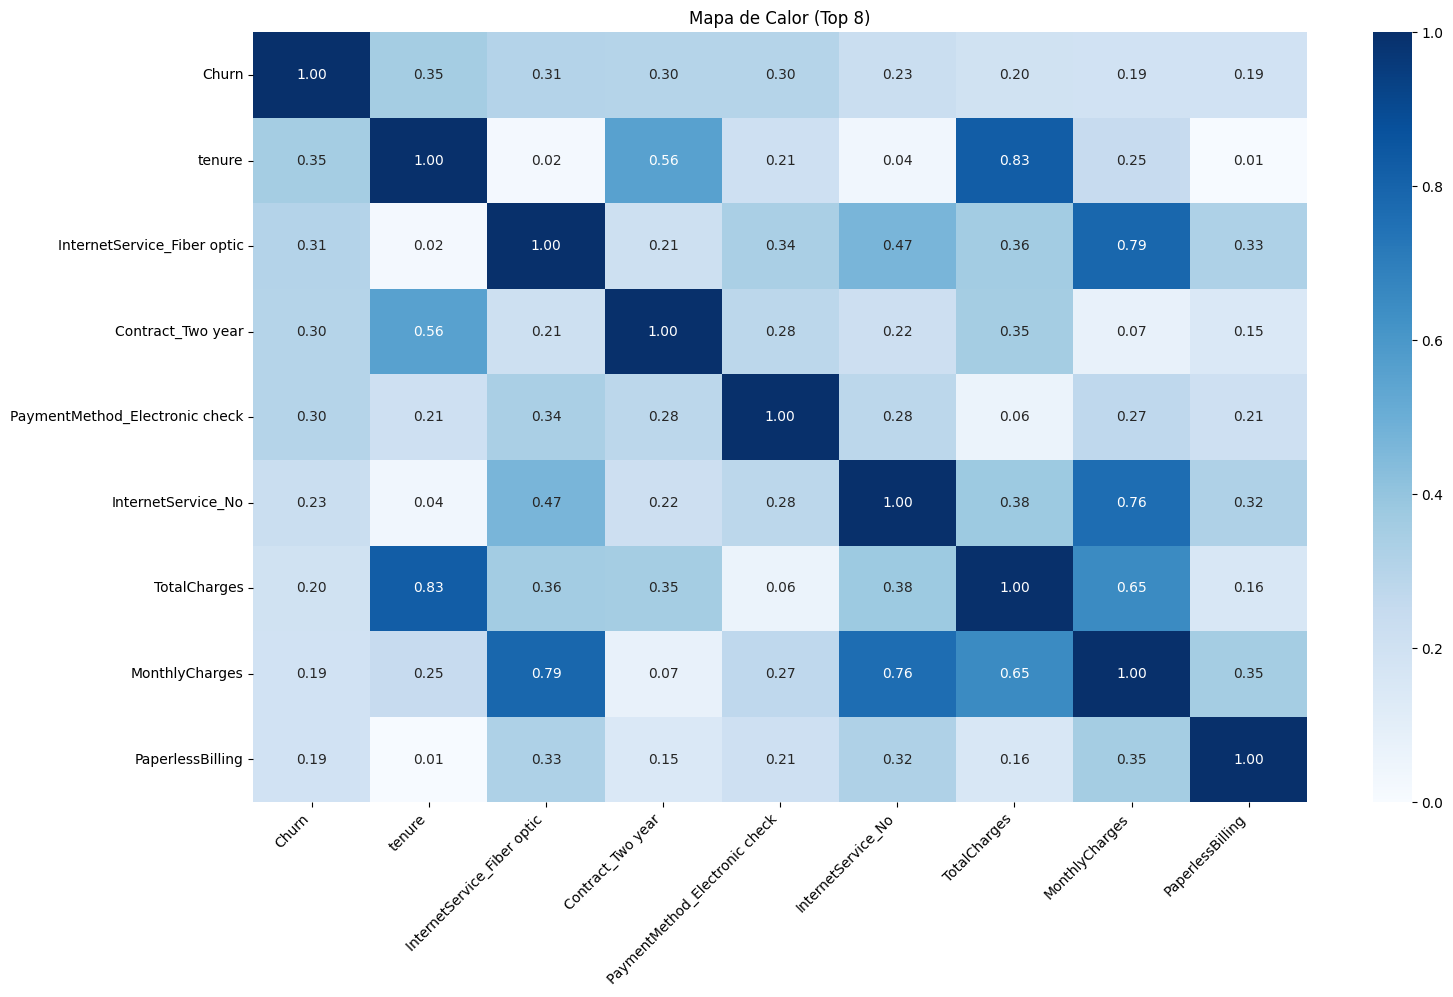

In [20]:
corr.heatmap(TARGET, n=8)

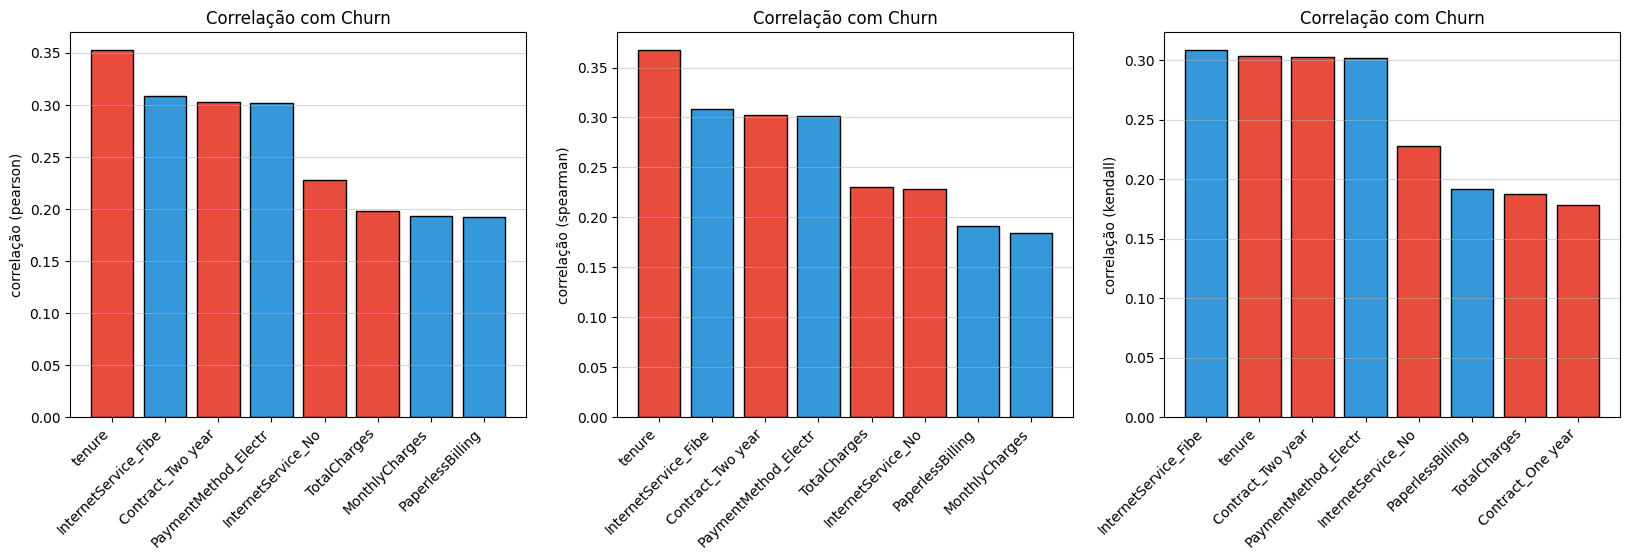

In [21]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
Correlations(df, tresh=0, method='pearson').plot(TARGET, show_max=8)

plt.subplot(1, 3, 2)
Correlations(df, tresh=0, method='spearman').plot(TARGET, show_max=8)

plt.subplot(1, 3, 3)
Correlations(df, tresh=0, method='kendall').plot(TARGET, show_max=8)

# SELEÇÃO

In [22]:
Correlations(df, tresh=0).get(TARGET)

{'tenure': -0.35222867011307885,
 'InternetService_Fiber optic': 0.3080197449448227,
 'Contract_Two year': -0.30225346934965014,
 'PaymentMethod_Electronic check': 0.30191874901128496,
 'InternetService_No': -0.22789044975609363,
 'TotalCharges': -0.1983242626039948,
 'MonthlyCharges': 0.19335642223784716,
 'PaperlessBilling': 0.19182533166646878,
 'Contract_One year': -0.1778200183499079,
 'OnlineSecurity': -0.1712262919485523,
 'TechSupport': -0.16467355590159402,
 'Dependents': -0.1642214015797254,
 'SeniorCitizen': 0.15088932817647233,
 'Partner': -0.15044754495917623,
 'PaymentMethod_Credit card (automatic)': -0.1343017506626284,
 'PaymentMethod_Mailed check': -0.09168283858842928,
 'OnlineBackup': -0.08225486893814256,
 'DeviceProtection': -0.06615979128028963,
 'StreamingTV': 0.06322774611875735,
 'StreamingMovies': 0.06138154801518694,
 'MultipleLines_Yes': 0.04010212769982612,
 'MultipleLines_No phone service': -0.011941980029003091,
 'PhoneService': 0.011941980029003084,
 'ge

In [23]:
best_corr = list(Correlations(df, tresh=0.15).get(TARGET))
best_corr

['tenure',
 'InternetService_Fiber optic',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'InternetService_No',
 'TotalCharges',
 'MonthlyCharges',
 'PaperlessBilling',
 'Contract_One year',
 'OnlineSecurity',
 'TechSupport',
 'Dependents',
 'SeniorCitizen',
 'Partner']

In [24]:
df = df[best_corr + [TARGET]]
df

,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,InternetService_No,TotalCharges,MonthlyCharges,PaperlessBilling,Contract_One year,OnlineSecurity,TechSupport,Dependents,SeniorCitizen,Partner,Churn
0,1,False,False,True,False,29.85,29.85,True,False,False,False,False,0,True,False
1,34,False,False,False,False,1889.50,56.95,False,True,True,False,False,0,False,False
2,2,False,False,False,False,108.15,53.85,True,False,True,False,False,0,False,True
3,45,False,False,False,False,1840.75,42.30,False,True,True,True,False,0,False,False
4,2,True,False,True,False,151.65,70.70,True,False,False,False,False,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,False,False,False,False,1990.50,84.80,True,True,True,True,True,0,True,False
7039,72,True,False,False,False,7362.90,103.20,True,True,False,False,True,0,True,False
7040,11,False,False,True,False,346.45,29.60,True,False,True,False,True,0,True,False
7041,4,True,False,False,False,306.60,74.40,True,False,False,False,False,1,True,True


# SALVANDO O MODELO

In [25]:
df.to_csv('files/Model.csv', index=None)